In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('D:\Desktop\Assignment 3\s.csv')

In [3]:
data

,x1,x2
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046
...,...,...
395,616325,730469
396,554610,782542
397,727303,809509
398,603709,757145


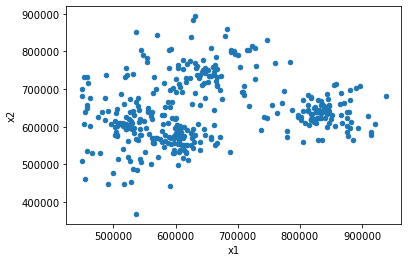

In [4]:
data.plot.scatter('x1', 'x2');

In [5]:
X = data['x1']
Y = data['x2']

In [6]:
import math
loss = []
cur_loss = []
for i, j in zip(X,Y):
    for n, m in zip(X,Y):
        cur_loss.append(math.sqrt((((n - i )**2) + ((m-j)**2) )))
    loss.append(cur_loss)
    cur_loss = []

In [7]:
proximity_matrix = pd.DataFrame(np.array(loss))

In [8]:
def getIndexes(dfObj, value):
    ''' Get index positions of value in dataframe i.e. dfObj.'''
    listOfPos = list()
    # Get bool dataframe with True at positions where the given value exists
    result = dfObj.isin([value])
    # Get list of columns that contains the value
    seriesObj = result.any()
    columnNames = list(seriesObj[seriesObj == True].index)
    # Iterate over list of columns and fetch the rows indexes where value exists
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            listOfPos.append((row, col))
    # Return a list of tuples indicating the positions of value in the dataframe
    return listOfPos

In [9]:
import sys
np.fill_diagonal(proximity_matrix.to_numpy(),sys.maxsize)
df = proximity_matrix.copy()

In [11]:
df

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,9.223372e+18,7.218653e+03,7.135748e+04,4.556174e+04,6.380356e+04,76348.461969,82281.509229,64003.230559,97738.680107,63953.577765,...,217736.139067,188969.202538,171195.877079,344205.650866,211213.832009,1.857864e+05,2.561985e+05,2.661616e+05,2.148772e+05,2.523618e+05
1,7.218653e+03,9.223372e+18,7.088479e+04,4.769263e+04,5.845879e+04,77745.914066,84652.796622,63382.650883,101851.475002,63329.389228,...,211754.859356,182241.080805,164179.944025,337385.756891,204004.094697,1.794711e+05,2.506154e+05,2.589430e+05,2.086470e+05,2.451925e+05
2,7.135748e+04,7.088479e+04,9.223372e+18,3.224191e+04,5.040168e+04,20112.728035,33030.461290,7566.276892,62505.370657,7623.050898,...,180164.092061,168374.802794,161410.287048,319927.392819,211549.805096,1.561103e+05,2.113345e+05,2.677242e+05,1.817246e+05,2.460038e+05
3,4.556174e+04,4.769263e+04,3.224191e+04,9.223372e+18,5.912384e+04,31112.283169,36960.482275,26997.504422,57154.647493,26979.136272,...,206139.432484,188146.087956,176812.438686,342408.756099,223730.762536,1.790375e+05,2.397917e+05,2.800230e+05,2.062373e+05,2.612936e+05
4,6.380356e+04,5.845879e+04,5.040168e+04,5.912384e+04,9.223372e+18,69360.059573,81896.560673,45628.040775,110021.517032,45577.683508,...,154510.938852,130394.145777,117727.037311,285591.331264,164972.847660,1.239451e+05,1.924132e+05,2.213149e+05,1.524903e+05,2.021698e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.857864e+05,1.794711e+05,1.561103e+05,1.790375e+05,1.239451e+05,175169.891209,187444.811569,156326.479756,216730.948302,156308.133595,...,36593.420570,24983.574704,49093.517984,163852.272810,91472.981000,9.223372e+18,8.074861e+04,1.362477e+05,2.950885e+04,1.055950e+05
396,2.561985e+05,2.506154e+05,2.113345e+05,2.397917e+05,1.924132e+05,227433.247824,237934.506169,213907.096304,264802.541532,213907.303592,...,44253.115608,96163.434657,125577.188255,135139.389243,150725.712634,8.074861e+04,9.223372e+18,1.747858e+05,5.527856e+04,1.411433e+05
397,2.661616e+05,2.589430e+05,2.677242e+05,2.800230e+05,2.213149e+05,287822.281017,300740.705705,265009.311627,330007.765806,264969.604068,...,147829.197904,112597.255992,107477.563426,127405.966254,56346.825368,1.362477e+05,1.747858e+05,9.223372e+18,1.342292e+05,3.379365e+04
398,2.148772e+05,2.086470e+05,1.817246e+05,2.062373e+05,1.524903e+05,200166.523500,212066.545575,182570.571520,240923.943650,182556.894419,...,14124.799361,40884.873156,70328.059976,139283.491172,99702.964876,2.950885e+04,5.527856e+04,1.342292e+05,9.223372e+18,1.010169e+05


In [12]:
used = []
while len(df.columns) > 4:
    search = df.min().min()
    indices = getIndexes(df, search)
    label1 = indices[0][0]
    label2 = indices[0][1]
    used.append(label1)
    used.append(label2)
    if type(label1) == int and type(label2) == int:
        #df[(label1, label2)] = list(zip(proximity_matrix[label1], proximity_matrix[label2]))
        df[(label1,label2)] = [min(i,j) for i, j in zip(df[label1], df[label2])]
        df = df.append(df[(label1,label2)].T)
        df = df.drop(labels = [label1, label2], axis = 1)
        df = df.drop(labels = [label1, label2], axis = 0)
    elif type(label1) == int and type(label2) == tuple:
        #df[(label1)] = list(zip(df[label1]))
        #df[tuple(list(label2) + [label1])] = df[label2] + df[(label1)]
        df[tuple(list(label2) + [label1])] = [min(i,j) for i, j in zip(df[label1], df[label2])]
        df = df.append(df[tuple(list(label2) + [label1])].T)
        df = df.drop(labels = [label1, label2], axis = 1)
        df = df.drop(labels = [label1, label2], axis = 0)
    elif type(label1) == tuple and type(label2) == int:
        #df[(label2)] = list(zip(df[label2]))
        #df[tuple(list(label1) + [label2])] = df[label1] + df[(label2)]
        df[tuple(list(label1) + [label2])] = [min(i,j) for i, j in zip(df[label1], df[label2])]
        df = df.append(df[tuple(list(label1) + [label2])].T)
        df = df.drop(labels = [label1, label2], axis = 1)
        df = df.drop(labels = [label1, label2], axis = 0)
    elif type(label1) == tuple and type(label2) == tuple:
        #df[label1 + label2] = df[label1] + df[label2]
        df[label1 + label2] = [min(i,j) for i, j in zip(df[label1], df[label2])]
        df = df.append(df[label1 + label2].T)
        df = df.drop(labels = [label1, label2], axis = 1)
        df = df.drop(labels = [label1, label2], axis = 0)

# this is really bad especially when it comes to data visualization there is just one big cluster and three points in this dataset and this means that the maximum method is better

In [13]:
df

,154,252,256,"(346, 321, 151, 146, 128, 173, 100, 194, 129, 104, 149, 168, 180, 141, 123, 172, 155, 189, 115, 148, 114, 162, 167, 118, 136, 112, 122, 121, 178, 133, 185, 165, 175, 101, 109, 138, 111, 183, 182, 161, 150, 140, 193, 169, 134, 184, 166, 106, 152, 126, 117, 197, 127, 190, 144, 160, 157, 164, 147, 187, 124, 153, 105, 181, 196, 188, 131, 137, 125, 102, 143, 132, 158, 145, 130, 119, 120, 108, 107, 156, 199, 159, 198, 135, 113, 174, 179, 176, 142, 103, 186, 170, 163, 191, 195, 171, 110, 192, 139, 116, ...)"
154,9.223372e+18,4.211960e+05,5.087641e+05,50070.378119
252,4.211960e+05,9.223372e+18,9.149780e+04,57660.710575
256,5.087641e+05,9.149780e+04,9.223372e+18,82816.730604
"(346, 321, 151, 146, 128, 173, 100, 194, 129, 104, 149, 168, 180, 141, 123, 172, 155, 189, 115, 148, 114, 162, 167, 118, 136, 112, 122, 121, 178, 133, 185, 165, 175, 101, 109, 138, 111, 183, 182, 161, 150, 140, 193, 169, 134, 184, 166, 106, 152, 126, 117, 197, 127, 190, 144, 160, 157, 164, 147, 187, 124, 153, 105, 181, 196, 188, 131, 137, 125, 102, 143, 132, 158, 145, 130, 119, 120, 108, 107, 156, 199, 159, 198, 135, 113, 174, 179, 176, 142, 103, 186, 170, 163, 191, 195, 171, 110, 192, 139, 116, ...)",5.007038e+04,5.766071e+04,8.281673e+04,NaN


# "used" is a list that contains all the combinations of clusters in the loop, thus we can use it to come up with at least 2 big clusters from the minimum method

In [28]:
used

[9,
 7,
 (9, 7),
 82,
 148,
 114,
 (9, 7, 82),
 48,
 (9, 7, 82, 48),
 66,
 193,
 169,
 287,
 51,
 189,
 115,
 236,
 201,
 76,
 28,
 70,
 35,
 95,
 90,
 184,
 166,
 14,
 11,
 232,
 45,
 292,
 271,
 (14, 11),
 (9, 7, 82, 48, 66),
 122,
 121,
 342,
 326,
 203,
 29,
 (193, 169),
 134,
 339,
 325,
 40,
 3,
 (14, 11, 9, 7, 82, 48, 66),
 (95, 90),
 276,
 85,
 352,
 19,
 (14, 11, 9, 7, 82, 48, 66, 95, 90),
 98,
 338,
 177,
 49,
 38,
 (339, 325),
 361,
 (14, 11, 9, 7, 82, 48, 66, 95, 90, 98),
 (76, 28),
 (14, 11, 9, 7, 82, 48, 66, 95, 90, 98, 76, 28),
 53,
 (189, 115),
 (148, 114),
 253,
 224,
 92,
 16,
 194,
 129,
 289,
 245,
 (194, 129),
 104,
 (289, 245),
 (253, 224),
 (194, 129, 104),
 149,
 (14, 11, 9, 7, 82, 48, 66, 95, 90, 98, 76, 28, 53),
 17,
 (14, 11, 9, 7, 82, 48, 66, 95, 90, 98, 76, 28, 53, 17),
 21,
 (292, 271),
 269,
 167,
 118,
 (184, 166),
 106,
 213,
 212,
 84,
 74,
 (189, 115, 148, 114),
 162,
 234,
 206,
 (276, 85),
 99,
 (213, 212),
 242,
 264,
 26,
 150,
 140,
 73,
 54,
 12

# l1 and l2 are two lists I got manually out of the used list to compare the minimum method to the other methods

In [18]:
l1 = [346,
  321,
  151,
  146,
  128,
  173,
  100,
  194,
  129,
  104,
  149,
  168,
  180,
  141,
  123,
  172,
  155,
  189,
  115,
  148,
  114,
  162,
  167,
  118,
  136,
  112,
  122,
  121,
  178,
  133,
  185,
  165,
  175,
  101,
  109,
  138,
  111,
  183,
  182,
  161,
  150,
  140,
  193,
  169,
  134,
  184,
  166,
  106,
  152,
  126,
  117,
  197,
  127,
  190,
  144,
  160,
  157,
  164,
  147,
  187,
  124,
  153,
  105,
  181,
  196,
  188,
  131,
  137,
  125,
  102,
  143,
  132,
  158,
  145,
  130,
  119,
  120,
  108,
  107,
  156,
  199,
  159,
  198,
  135,
  113,
  174,
  179,
  176,
  142,
  103,
  186,
  170,
  163,
  191,
  195,
  171,
  110,
  192,
  139,
  116]

In [19]:
l2 = [397,
  371,
  386,
  328,
  379,
  329,
  327,
  308,
  399,
  330,
  344,
  83,
  302,
  313,
  398,
  357,
  376,
  390,
  339,
  325,
  361,
  360,
  373,
  380,
  301,
  392,
  366,
  311,
  378,
  348,
  323,
  342,
  326,
  305,
  345,
  353,
  304,
  370,
  341,
  391,
  362,
  374,
  388,
  314,
  315,
  343,
  331,
  324,
  384,
  310,
  336,
  383,
  354,
  359,
  381,
  333,
  364,
  317,
  395,
  347,
  372,
  306,
  377,
  334,
  358,
  350,
  367,
  250,
  340,
  288,
  282,
  266,
  219,
  290,
  237,
  213,
  212,
  242,
  243,
  230,
  236,
  201,
  289,
  245,
  253,
  224,
  248,
  207,
  225,
  292,
  271,
  269,
  298,
  283,
  265,
  238,
  267,
  251,
  259,
  228,
  268,
  209,
  284,
  279,
  255,
  232,
  45,
  233,
  62,
  81,
  41,
  46,
  12,
  34,
  18,
  96,
  55,
  31,
  20,
  92,
  16,
  64,
  14,
  11,
  9,
  7,
  82,
  48,
  66,
  95,
  90,
  98,
  76,
  28,
  53,
  17,
  21,
  2,
  84,
  74,
  25,
  42,
  27,
  36,
  89,
  37,
  352,
  19,
  91,
  78,
  70,
  35,
  39,
  40,
  3,
  49,
  38,
  274,
  5,
  24,
  32,
  79,
  280,
  57,
  50,
  295,
  22,
  43,
  65,
  264,
  26,
  203,
  29,
  93,
  10,
  296,
  276,
  85,
  99,
  86,
  6,
  72,
  30,
  71,
  69,
  63,
  94,
  80,
  87,
  68,
  13,
  285,
  222,
  297,
  229,
  272,
  218,
  382,
  369,
  316,
  47,
  287,
  51,
  231,
  211,
  299,
  234,
  206,
  263,
  261,
  73,
  54,
  77,
  58,
  44,
  246,
  226,
  244,
  227,
  61,
  56,
  97,
  1,
  0,
  15,
  59,
  4,
  202,
  23,
  320,
  249,
  88,
  318,
  208,
  67,
  75,
  204,
  52,
  235,
  254,
  205,
  33,
  270,
  8,
  223,
  214,
  278,
  217,
  247,
  239,
  216,
  240,
  286,
  221,
  275,
  351,
  258,
  200,
  312,
  60,
  281,
  260,
  257,
  307,
  273,
  303,
  291,
  210,
  277,
  394,
  337,
  368,
  335,
  349,
  309,
  338,
  177,
  322,
  363,
  355,
  387,
  293,
  215,
  241,
  262]

In [20]:
data['id'] = pd.DataFrame([i for i in range(400)])

In [21]:
data

,x1,x2,id
0,664159,550946,0
1,665845,557965,1
2,597173,575538,2
3,618600,551446,3
4,635690,608046,4
...,...,...,...
395,616325,730469,395
396,554610,782542,396
397,727303,809509,397
398,603709,757145,398


In [22]:
data['label1'] = data.id.map(lambda x: 'r' if x in l1 else '')

In [23]:
data['label2'] = data.id.map(lambda x: 'b' if x in l2 else '')

In [24]:
data['label3'] = data.id.map(lambda x: 'g' if x not in l1 and x not in l2 else '')

In [25]:
data

,x1,x2,id,label1,label2,label3
0,664159,550946,0,,b,
1,665845,557965,1,,b,
2,597173,575538,2,,b,
3,618600,551446,3,,b,
4,635690,608046,4,,b,
...,...,...,...,...,...,...
395,616325,730469,395,,b,
396,554610,782542,396,,,g
397,727303,809509,397,,b,
398,603709,757145,398,,b,


# I will have the first cluster in red and the second in blue and the other points that are not yet added to these two clusters are in green.

In [26]:
data['label'] = data['label1'] + data['label2'] + data['label3']
data

,x1,x2,id,label1,label2,label3,label
0,664159,550946,0,,b,,b
1,665845,557965,1,,b,,b
2,597173,575538,2,,b,,b
3,618600,551446,3,,b,,b
4,635690,608046,4,,b,,b
...,...,...,...,...,...,...,...
395,616325,730469,395,,b,,b
396,554610,782542,396,,,g,g
397,727303,809509,397,,b,,b
398,603709,757145,398,,b,,b


# the result is great it beats the result from the maximum method when it comes to two clusters

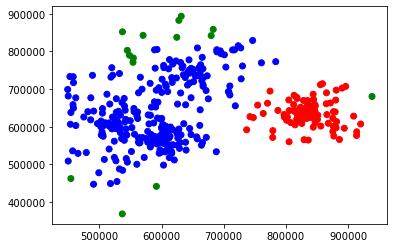

In [27]:
plt.scatter(data['x1'], data['x2'], c = data['label'].to_list())